In [32]:
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

train_validation_split = tfds.Split.TRAIN.subsplit([8, 2])

(mnist_train, mnist_validate, mnist_test), info = tfds.load(
    name="mnist", 
    split=["train[:80%]", "train[80%:]", "test"],
    with_info=True,
    as_supervised=True
)

print(len(list(mnist_train)))
print(len(list(mnist_validate)))
print(len(list(mnist_test)))

tfds.core.DatasetInfo(
    name='mnist',
    version=1.0.0,
    description='The MNIST database of handwritten digits.',
    urls=['https://storage.googleapis.com/cvdf-datasets/mnist/'],
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10)
    },
    total_num_examples=70000,
    splits={
        'test': <tfds.core.SplitInfo num_examples=10000>,
        'train': <tfds.core.SplitInfo num_examples=60000>
    },
    supervised_keys=('image', 'label'),
    citation='"""
        @article{lecun2010mnist,
          title={MNIST handwritten digit database},
          author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
          journal={ATT Labs [Online]. Available: http://yann. lecun. com/exdb/mnist},
          volume={2},
          year={2010}
        }
        
    """',
    redistribution_info=,
)



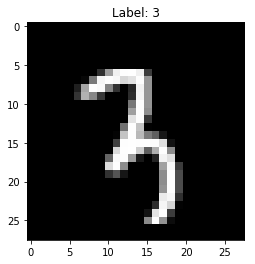

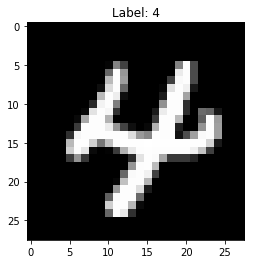

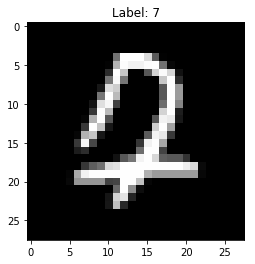

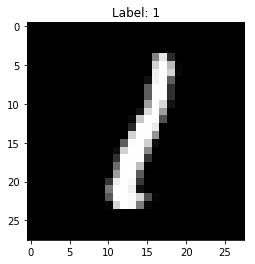

In [27]:
for mnist_example in mnist_train.take(4):
    image, label = mnist_example

    plt.imshow(image.numpy()[:, :, 0], cmap=plt.get_cmap("gray"))
    plt.title("Label: {}".format(label.numpy()))
    plt.show()
    plt.close()

In [28]:
def encode(image, label):
    image_encoded = tf.image.convert_image_dtype(image, dtype=tf.float32)
    label_encoded = tf.one_hot(label, depth=10)
    return image_encoded, label_encoded

mnist_train = mnist_train.map(lambda image, label: encode(image, label))
mnist_validate = mnist_validate.map(lambda image, label: encode(image, label))
mnist_test = mnist_test.map(lambda image, label: encode(image, label))

In [29]:
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Flatten(input_shape=(28, 28, 1)))
model.add(layers.Dense(512, activation="relu"))
model.add(layers.Dense(10, activation="softmax"))
model.summary()

model.compile(
    optimizer="rmsprop",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


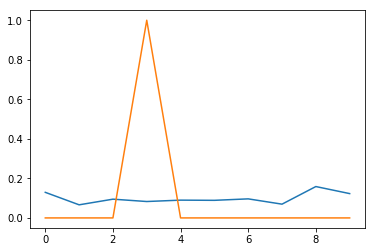

In [30]:
mnist_example = list(mnist_train.take(1).as_numpy_iterator())[0]

image, label = mnist_example
prediction = model.predict(np.array([image]))
plt.plot(prediction[0])
plt.plot(label)

In [31]:
history = model.fit(
    mnist_train.batch(32),
    epochs=5,
    validation_data=mnist_validate.batch(32)
)

Epoch 1/5
1500/1500 [==============================] - 10s 7ms/step - loss: 0.2188 - accuracy: 0.9347 - val_loss: 0.1361 - val_accuracy: 0.9606
Epoch 2/5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0948 - accuracy: 0.9723 - val_loss: 0.1223 - val_accuracy: 0.9660
Epoch 3/5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0642 - accuracy: 0.9820 - val_loss: 0.1183 - val_accuracy: 0.9685
Epoch 4/5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0475 - accuracy: 0.9878 - val_loss: 0.1214 - val_accuracy: 0.9722
Epoch 5/5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0365 - accuracy: 0.9913 - val_loss: 0.1224 - val_accuracy: 0.9746


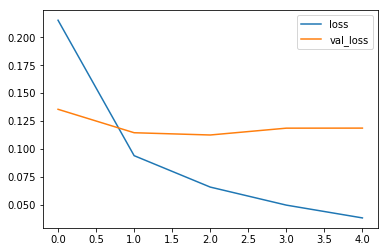

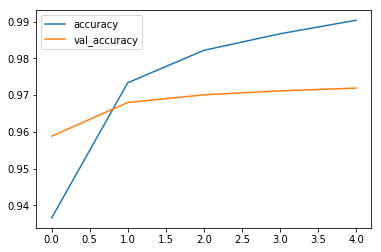

In [7]:
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.legend()
plt.show()
plt.close()

plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.legend()
plt.show()
plt.close()

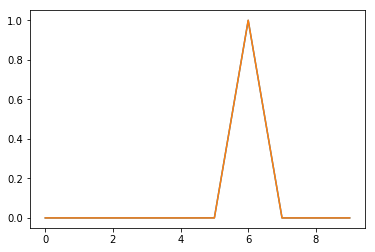

In [8]:
mnist_example = list(mnist_train.take(1).as_numpy_iterator())[0]

image, label = mnist_example
prediction = model.predict(np.array([image]))
plt.plot(prediction[0])
plt.plot(label)

In [11]:
loss, acc = model.evaluate(mnist_test.batch(32))
loss, acc

    313/Unknown - 1s 4ms/step - loss: 0.1127 - accuracy: 0.9741

(0.11272496732585795, 0.9741)

In [12]:
model.save("model.h5")